## <b> Google Colaboratory </b> ##
![alt text](https://scontent-ort2-2.xx.fbcdn.net/v/t1.0-9/53817068_748206782239449_1414198946636496896_n.png?_nc_cat=106&_nc_ohc=DSr74RyIcf8AQnJhkM-N9a5KgXwhFIPxUvHhaRGnuSS-DlByG-BKfJM5Q&_nc_ht=scontent-ort2-2.xx&oh=7fcbd026686cb6f95315de61692f1819&oe=5E6EA753)

---
### What is it? ###
1. Refer to [Colaboratory](https://research.google.com/colaboratory/faq.html):
2. A research tool for training ML models;
3. Environment: Jupyter notebook;
4. Features: free, almost <b> NO CONFIGURATION NEEDED</b>;
5. Where it is stored: Google Drive;
---
### What is it composed of? ###
1. A list of "cells", including <b>code cells</b> and <b>text cells</b>
2. Code cell: for writing Python code or statements. <b>NOTICE:</b> always put an <b>exclamation mark</b> before your bash statements;
```python
def func(): pass
```
```bash
! pwd
```
3. Text cell: use <b>markdown</b> syntax. It also supports LaTex. You could put visualization results and comments here.
$$
\left[\begin{matrix}
	1 & 0 & 0 & 0 \\
	0 & 1 & 0 & 0 \\
	0 & 0 & 1 & 0 \\
	0 & 0 & \frac{1}{d} & 0
\end{matrix}\right]
$$
---
### Notes on using Google Colab: ###
1. It will <b>REMOVE ALL</b> your uploaded files every 12 hours;
2. It is strongly recommended that you mount your Google Drive to Google Colab;
3. It is slower, better for light networks.
---
### Steps: ###
1. Check configurations;
2. Mount your Google Drive;
3. Test the configuration and necessary packages;
4. Upload your datasets;
5. Begin to train your model (or resume from the breakpoint);
6. Test your model;

In [1]:
# configuration
! uname -a  # system x86_64 GNU/Linux
! python --version  # Python 3.6.7
! nvcc --version  # cuda release 9.2, V9.2.148

Linux 2c9b1c798e30 4.14.137+ #1 SMP Thu Aug 8 02:47:02 PDT 2019 x86_64 x86_64 x86_64 GNU/Linux
Python 3.6.9
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [3]:
# Now get Pytorch:
! pip3 install torch torchvision

In [4]:
# mount your Google Drive:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)  # on /content/drive/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [5]:
# verify your configuration:
import torch
import torchvision
print('All set!')

All set!


In [0]:
# path test:
! ls /content/drive/My\ Drive
! ls /content
! pwd  # /content

In [6]:
# check dependency:
import argparse  # parse command line options
import numpy  # scientific computing
import matplotlib.pyplot as plt  # draw figures
from PIL import Image  # image processing

print('all packages installed.')

all packages installed.


### <b> Demo 1: Classification </b> ###
![alt text](https://www.cs.toronto.edu/~kriz/cifar-10-sample/bird9.png) ![alt text](https://www.cs.toronto.edu/~kriz/cifar-10-sample/automobile9.png) ![alt text](https://www.cs.toronto.edu/~kriz/cifar-10-sample/airplane4.png) ![alt text](https://www.cs.toronto.edu/~kriz/cifar-10-sample/dog9.png) ![alt text](https://www.cs.toronto.edu/~kriz/cifar-10-sample/ship3.png)
---
1. Dataset: `CIFAR 10`;
<br>Images for training: 50,000; for testing: 10,000;
<br>Images: 32*32 color images in 10 classes;
<br>Classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck;
<br>Size: 163 MB;
2. Goal: train a CNN (14 conv layers) or a ResNet (18 layers);
3. No need to download the dataset by yourself:
```python
from torchvision.datasets import CIFAR10
```
Other datasets included: `MNIST`, `Fashion-MNIST`, `KMNIST`, `EMNIST`, `QMNIST`, `FakeData`, `COCO`, `LSUN`, `ImageFolder`, `DatasetFolder`, `ImageNet`, `CIFAR`, `STL10`, `SVHN`, `PhotoTour`, `SBU`, `Flickr`, `VOC`, `Cityscapes`, `SBD`, `USPS`, `Kinetics-400`, `HMDB51`, `UCF101`;

In [0]:
# download dataset using torchvision:
import torchvision
from torchvision.datasets import CIFAR10

In [0]:
# Run it!
# --cuda: the tensors should be shipped to the graphics card;
# --bs: batch size (total number of training examples present in a single batch);

# epoch: one epoch is when an ENTIRE dataset is passed forward and backward through the neural network only ONCE.
# batch: divide dataset into a number of batches
# iteration: number of batches needed to complete one epoch
# e.g. there's a dataset which has 2,000 images for training;
# we define batch size as 500, then there'll be 4 iterations to complete one epoch.

# The learning rate is a hyperparameter that controls how much to
# change the model in response to the estimated error each time the model weights are updated.

# decay step: reduce the learning rate by some factor every few epochs.

! python /content/drive/My\ Drive/test2/main2.py --cuda --net ResNet18 --epochs 35 --bs 20

Called with args:
Namespace(batch_size=20, checkepoch=1, crop_size=32, cuda=True, decay_step=10, lr=0.001, max_epochs=35, net_type='ResNet18', num_workers=0, resume=False, save_dir='/content/drive/My Drive/test2/load/')
Files already downloaded and verified
Files already downloaded and verified
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:100: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
after epoch 1/35, train_loss: 1.681, train_acc: 0.38, test_acc: 0.53, time: 110.38
updated, epoch 1 saved


In [8]:
# assume we want to resume:
# --bs: batch size;
# --r: resume;
# --checkepoch: start from which epoch.
! python /content/drive/My\ Drive/test2/main2.py --cuda --net ResNet18 --epochs 35 --bs 20 --r True --checkepoch 33

Called with args:
Namespace(batch_size=20, checkepoch=33, crop_size=32, cuda=True, decay_step=10, lr=0.001, max_epochs=35, net_type='ResNet18', num_workers=0, resume=True, save_dir='/content/drive/My Drive/test2/load/')
Files already downloaded and verified
Files already downloaded and verified
loading checkpoint /content/drive/My Drive/test2/load/SimpleNet_33.pth
loaded checkpoint /content/drive/My Drive/test2/load/SimpleNet_33.pth
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:100: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
Traceback (mo

In [0]:
# Resume (actual):
# --bs: batch size;
# --r: resume;
# --checkepoch: start from which epoch.
! python /content/drive/My\ Drive/test2/main2.py --cuda --net ResNet18 --epochs 35 --bs 20 --r True --checkepoch 11

Called with args:
Namespace(batch_size=20, checkepoch=11, crop_size=32, cuda=True, decay_step=10, lr=0.001, max_epochs=35, net_type='ResNet18', num_workers=0, resume=True, save_dir='/content/drive/My Drive/test2/load/')
Files already downloaded and verified
Files already downloaded and verified
loading checkpoint /content/drive/My Drive/test2/load/SimpleNet_11.pth
loaded checkpoint /content/drive/My Drive/test2/load/SimpleNet_11.pth
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:100: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
after epoch 1

In [9]:
# print the structure of ResNet18 (pwd: /content):
! cd ./drive/My\ Drive/test2  # which has ResNet.py under the directory
! python /content/drive/My\ Drive/test2/ShowResNet.py

ResNet18(
  (head): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (block1_1): ResModule(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU()
    (shortcut): Sequential()
  )
  (block1_2): ResModule(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU

In [0]:
# print the structure of another net:
! cd ./drive/My\ Drive/test2
! python /content/drive/My\ Drive/test2/SimpleNet.py

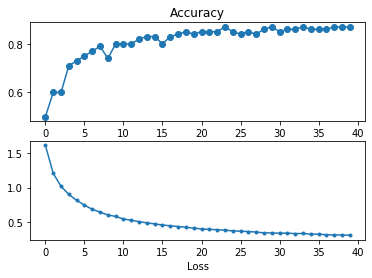

In [0]:
# Draw figures while training, showing how loss and accuracy change over time.
import matplotlib.pyplot as plt
num_epoch = 40
x1 = range(num_epoch)
x2 = range(num_epoch)
loss_list = [1.605, 1.203, 1.018, 0.900, 0.815, 0.748, 0.686, 0.646, \
             0.606, 0.584, 0.548, 0.529, 0.509, 0.492, 0.477, 0.461, \
             0.450, 0.439, 0.428, 0.416, 0.405, 0.398, 0.394, 0.386, \
             0.377, 0.372, 0.367, 0.360, 0.348, 0.347, 0.343, 0.344, \
             0.337, 0.340, 0.328, 0.330, 0.320, 0.317, 0.319, 0.313] # train
acc_list =  [0.50, 0.60, 0.60, 0.71, 0.73, 0.75, 0.77, 0.79, 0.74, \
             0.80, 0.80, 0.80, 0.82, 0.83, 0.83, 0.80, 0.83, 0.84, \
             0.85, 0.84, 0.85, 0.85, 0.85, 0.87, 0.85, 0.84, 0.85, \
             0.84, 0.86, 0.87, 0.85, 0.86, 0.86, 0.87, 0.86, 0.86, \
             0.86, 0.87, 0.87, 0.87] # test
y1, y2 = acc_list, loss_list
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('Accuracy')
plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('Loss')
plt.show()

In [0]:
# Prediction (cannot show the images):
# NOTICE: the parameters should exactly be the same as the ones used in the training phase.
! python /content/drive/My\ Drive/test2/inf.py

In [0]:
# a 2nd method: use TensorBoardX to visualize the structure of the net:
# input: [1, 3, 32, 32]
! cd ./drive/My\ Drive/test2
! pip install tensorboardX
import torch
import torchvision
from ResNet import ResNet18
from tensorboardX import SummaryWriter

model = ResNet18()
dummy_input = torch.rand([1, 3, 32, 32])
with SummaryWriter(comment='ResNet18') as w:
  w.add_graph(model, (dummy_input, ))  # will generate 'runs' folder under the parent directory

     |████████████████████████████████| 194kB 9.3MB/s 


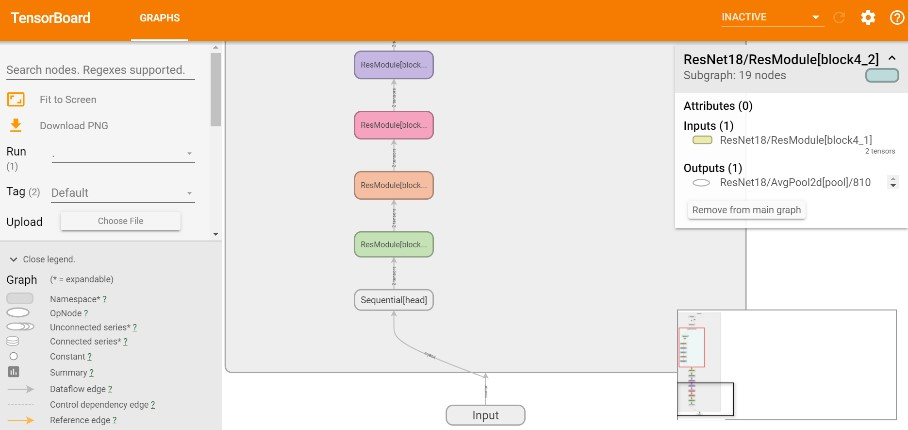

In [0]:
# to run TensorBoard:
# it cannot be run on Colab.
# 1. find 'runs' folder;
# 2. copy the file (startng with 'events.out.tfevents') under it;
# 3. paste the file to a LOCAL folder in your computer (the folder should be empty);
# 4. run the instruction below (in the LOCAL terminal):
! pip install tensorboard
! tensorboard --logdir [path of that folder]
# 5. copy the url and enter it in a browser.

import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/My Drive/test2/tf-1.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

loading checkpoint /content/drive/My Drive/test2/load/SimpleNet_34.pth
loaded checkpoint /content/drive/My Drive/test2/load/SimpleNet_34.pth


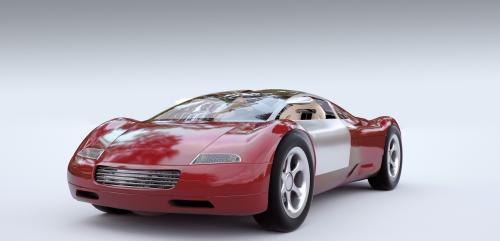

predicted class: automobile


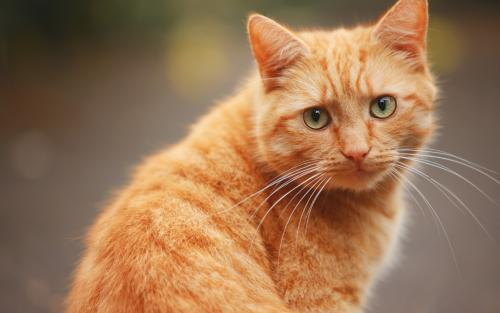

predicted class: cat


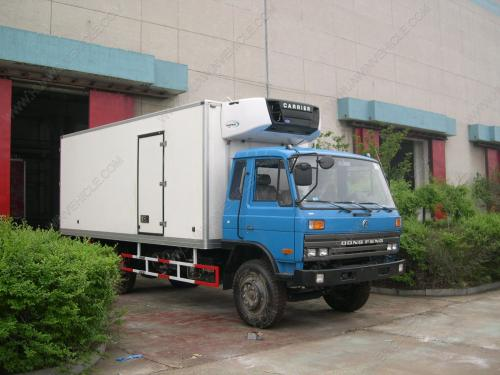

predicted class: truck


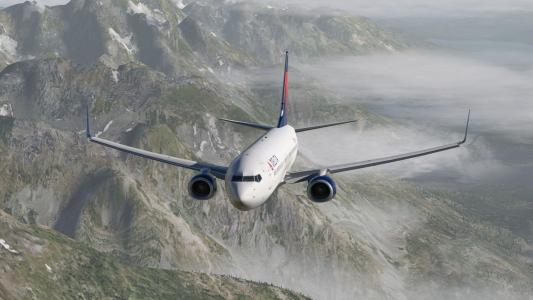

predicted class: airplane


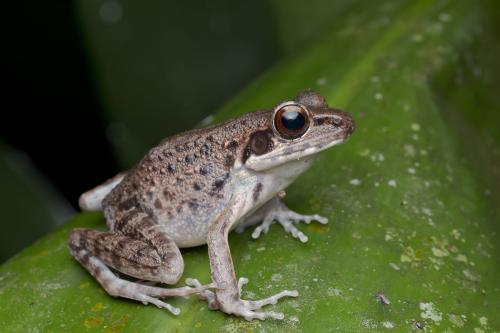

predicted class: frog


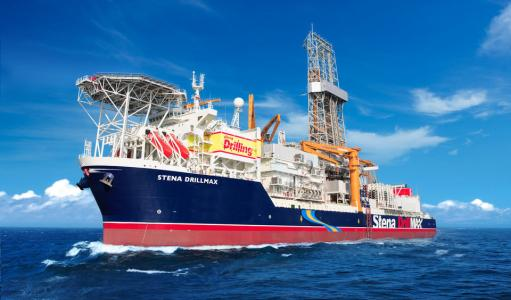

predicted class: ship


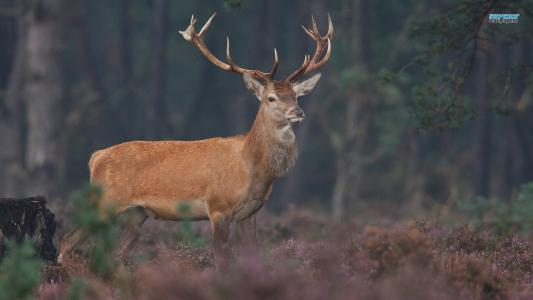

predicted class: deer


In [10]:
# inf.py:
# the images for prediction are not from the dataset, but randomly collected from the Internet.

import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as tf
from torch.autograd import Variable
from torchvision import models

import numpy as np
from PIL import Image
#import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

import sys
sys.path.append('/content/drive/My Drive/test2/')
from main2 import SimpleNet
from ResNet import ResNet18

home_dir = '/content/drive/My Drive/test2/'


def inf_transform(image):
	# image: PIL.Image object
	w, h = image.size
	preprocess = tf.Compose([
		tf.CenterCrop(min(w, h)),
		tf.Resize(32),
		tf.ToTensor(),
		tf.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
	])
	return preprocess(image)


classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

if __name__ == '__main__':
	#net = SimpleNet() # num_classes=10
	net = ResNet18()
	"""
	w/o the line below:
	RuntimeError: Input type (CUDAFloatTensor) and weight type (CPUFloatTensor) should be the same
	"""
	net.cuda()

	# load parameters into the model:
	load_name = home_dir + "load/" + 'SimpleNet_34.pth'
	print("loading checkpoint %s" % (load_name))
	checkpoint = torch.load(load_name)
	net.load_state_dict(checkpoint['model'])
	print("loaded checkpoint %s" % (load_name))

	num_pics = 7 # 7 pictures to infer
	images = [home_dir + 'images/image' + str(i) + '.jpg' for i in range(1, num_pics + 1)]

	for j in images: # traverse every image
		inputs = inf_transform(Image.open(j)).float() # open image, transform, and convert to tensor
		inputs = inputs.unsqueeze_(0) # === add one dimension, since net treats inputs as batch
		net.eval()
		inputs = Variable(inputs.cuda())
		#print(inputs.shape)  # ===
		outputs = net(inputs) # expect a 1*10 vector
		"""
		At first: index = outputs.data.numpy().argmax()
		can't convert CUDA tensor to numpy (it doesn't support GPU arrays).
		Use .cpu() to move the tensor to host memory first.
		"""
		index = outputs.data.cpu().numpy().argmax()

		# show image:
		img = cv2.imread(j, cv2.IMREAD_UNCHANGED)
		cv2_imshow(img)

		print('predicted class:', classes[index])

### <b> Demo2: Classification & Localization on Birds Images </b> ###
![alt text](http://www.vision.caltech.edu/visipedia/collage.jpg)

---
1. Dataset: [CUB-200-2011](http://www.vision.caltech.edu/visipedia/CUB-200-2011.html);
<br>Number of images: 11,788, size not fixed;
<br>Categories: 200;
<br>Annotation for every image: category and a bounding box;
2. Structure: `ResNet18` + two branches (conv layers or fc layers);
<br>Net: self-implemented ResNet, or the pre-trained model:
```python
model = torchvision.models.resnet18(pretrained=True)
```
`torchvision.models` include `AlexNet`, `VGG`, `ResNet`, `SqueezeNet`, `DenseNet`, `Inception v3`, `GoogLeNet`, `ShuffleNet v2`, `MobileNet v2`, `ResNeXt`, `Wide ResNet`, `MNASNet`;
3. Goal: predict the class as well as the bounding box;

In [11]:
# show the architecture of the net:
! cd ./drive/My\ Drive/test3
! pwd
import torch, torchvision
import torch.nn as nn
from torchvision import models

class DetectionNet(nn.Module):
	def __init__(self, pre_model, num_classes=200): # pre_model: resnet18
		super(DetectionNet, self).__init__()
		self.head = nn.Sequential(*list(pre_model.children())[:-1]) # discard the final fc layer
		self.n_features = pre_model.fc.in_features
		# may also convert the fc layers to conv layers
		self.fc1 = nn.Linear(self.n_features, 4) # predict the 4 coordinates of bbox
		self.fc2 = nn.Linear(self.n_features, num_classes) # predict which class the input belongs to


	def forward(self, x):
		x = self.head(x) # first get features after resnet18
		x = x.view(-1, self.n_features) # flattended before entering fc layers
		return self.fc1(x), self.fc2(x) # return bbox, class distribution

net = DetectionNet(models.resnet18(), 200)  # model = models.resnet18(pretrained=True)
print(net)

/content
DetectionNet(
  (head): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_

In [0]:
# start training:
# --bs: batch size;
# --lr: learning rate;
# --decay: decay step;
! python /content/drive/My\ Drive/test3/main3.py --cuda --epochs 20 --bs 32 --lr 0.0005 --decay 8

Called with args:
Namespace(batch_size=32, checkepoch=1, cuda=True, decay_step=8, lr=0.0005, max_epochs=20, num_workers=0, resize=224, resume=False, save_dir='/content/drive/My Drive/test3/load/', use_self=False)
Dataset loaded
Dataset loaded
/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:100: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule.See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
updated, epoch 1 saved
after epoch 1/20, train_loss: 39.975, train_acc: 0.00, test_loss: 35.402, test_acc: 0.00, time: 95.55
updated, epoch 2 saved
after epoch 2/20, train_loss: 29.172, train_acc: 0.00, test

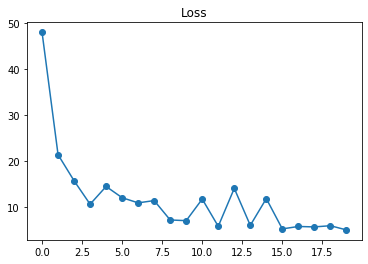

In [0]:
# Draw figures
import matplotlib.pyplot as plt
num_epoch = 20
x = range(num_epoch)
loss_list = [48.011, 21.419, 15.761, 10.668, 14.522, \
             12.081, 10.962, 11.457,  7.245,  7.099, \
             11.785,  5.869, 14.109,  6.077, 11.886, \
              5.306,  5.836,  5.738,  5.999,  5.087] # train
y = loss_list
plt.plot(x, y, 'o-')
plt.title('Loss')
plt.show()

In [12]:
# test (inf.py):
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as tf
from torch.autograd import Variable
from torchvision import models

import cv2
import numpy as np
import time
from PIL import Image

from google.colab.patches import cv2_imshow

import sys
sys.path.append('/content/drive/My Drive/test3/')
from main3 import DetectionNet

home_dir = '/content/drive/My Drive/test3/'
data_dir = home_dir + 'data/CUB_200_2011/'


def get_classes(root=data_dir):
	class_file_name = root + 'classes.txt'
	classes_map = []
	classes_map.append('none') # dummy at classes_map[0]
	with open(class_file_name) as f:
		for line in f.read().splitlines():
			classes_map.append(line.split(' ')[1])
	return classes_map


def inf_transform(img, size=224): # img: PIL.Image object
	preprocess = tf.Compose([
		tf.Resize((size, size)),
		tf.ToTensor(),
		tf.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
	])
	return preprocess(img)


def bbox_inv_transform(bbox, w, h, size=224): # bbox: 1 * 4
	w_ratio = w / size
	h_ratio = h / size
	b = [int(bbox[0][0] * w_ratio), int(bbox[0][1] * h_ratio), int(bbox[0][2] * w_ratio), int(bbox[0][3] * h_ratio)]
	b[0] = max(b[0], 0)
	b[1] = max(b[1], 0)
	b[2] = min(w - 1 - b[0], b[2])
	b[3] = min(h - 1 - b[1], b[3])
	return b


def show(img, gt, pred, index):
	cv2.rectangle(img, (gt[0], gt[1]), (gt[0] + gt[2], gt[1] + gt[3]), (0, 255, 0), thickness=2)
	cv2.rectangle(img, (pred[0], pred[1]), (pred[0] + pred[2], pred[1] + pred[3]), (255, 0, 0), thickness=2)
	cv2_imshow(img)
	cv2.imwrite(home_dir + 'output/result' + str(index) + '.jpg', img)


if __name__ == '__main__':
	images = [
		'images/001.Black_footed_Albatross/Black_Footed_Albatross_0061_796082.jpg',
		'images/002.Laysan_Albatross/Laysan_Albatross_0056_500.jpg',
		'images/003.Sooty_Albatross/Sooty_Albatross_0024_1161.jpg',
		'images/005.Crested_Auklet/Crested_Auklet_0070_785261.jpg',
		'images/017.Cardinal/Cardinal_0105_19045.jpg',
		'images/024.Red_faced_Cormorant/Red_Faced_Cormorant_0021_796265.jpg',
		'images/054.Blue_Grosbeak/Blue_Grosbeak_0075_36963.jpg',
		'images/070.Green_Violetear/Green_Violetear_0048_60789.jpg'
	]
	bboxes = [
		[50, 25, 156, 139],
		[92, 47, 331, 260],
		[98, 140, 181, 247],
		[133, 20, 309, 355],
		[138, 115, 280, 194],
		[91, 86, 193, 208],
		[196, 108, 156, 152],
		[54, 58, 273, 348]
	]
	classes_map = get_classes()
	sizes = [] # original sizes
	net = DetectionNet(models.resnet18(pretrained=True))
	net.cuda()

	# load parameters into the model:
	load_name = home_dir + 'load/' + 'DetectionNet_19.pth'
	print("loading checkpoint %s" % (load_name))
	checkpoint = torch.load(load_name)
	net.load_state_dict(checkpoint['model'])
	print("loaded checkpoint %s" % (load_name))

	for i, j in enumerate(images):
		img = Image.open(data_dir + j).convert('RGB')
		sizes.append(img.size) # [w, h]
		inputs = inf_transform(img).unsqueeze_(0)
		net.eval()
		inputs = Variable(inputs.cuda())
		outputs1, outputs2 = net(inputs)
		outputs2 = nn.functional.log_softmax(outputs2, dim=1)
		#print('outputs1:', outputs1.cpu().data) # FloatTensor of size 1(row)*4(column)
		#print('outputs2:', outputs2.cpu().data) # FloatTensor of size 1*200
		index = outputs2.data.cpu().max(1, keepdim=True)[1] # pred
		#print('index:', index)
		print('class:', classes_map[index[0][0]])
		pred = bbox_inv_transform(outputs1.data.cpu(), sizes[i][0], sizes[i][1])
		show(cv2.imread(data_dir + j), bboxes[i], pred, i + 1)

# tests:
# 24   001.Black_footed_Albatross/Black_Footed_Albatross_0061_796082.jpg
# 24   50.0 25.0 156.0 139.0
# 24   1
# 102  002.Laysan_Albatross/Laysan_Albatross_0056_500.jpg
# 102  92.0 47.0 331.0 260.0
# 102  2
# 139  003.Sooty_Albatross/Sooty_Albatross_0024_1161.jpg
# 139  98.0 140.0 181.0 247.0
# 139  3
# 277  005.Crested_Auklet/Crested_Auklet_0070_785261.jpg
# 277  133.0 20.0 309.0 355.0
# 277  5
# 921  017.Cardinal/Cardinal_0105_19045.jpg
# 921  138.0 115.0 280.0 194.0
# 921  17
# 1293 024.Red_faced_Cormorant/Red_Faced_Cormorant_0021_796265.jpg
# 1293 91.0 86.0 193.0 208.0
# 1293 24
# 3090 054.Blue_Grosbeak/Blue_Grosbeak_0075_36963.jpg
# 3090 196.0 108.0 156.0 152.0
# 3090 54
# 4053 070.Green_Violetear/Green_Violetear_0048_60789.jpg
# 4053 54.0 58.0 273.0 348.0
# 4053 70

Output hidden; open in https://colab.research.google.com to view.

### <b>Tips on training your DL models (They are important!!)</b> ###
![alt text](https://miro.medium.com/max/609/1*B_EOC2l6EIKmgQRKJ4g_lg.gif)

---
1. Keep your codes well organized.
<br>Do NOT make all modifications on the same source file; copy them first. Keep directories like:
```
NN-v1/  NN-v2/  NN-v3/  ...
```
2. Have a public package (.py) keep the paths.
<br>There are paths of the project main directory, where the trained weights are kept, and of the datasets. So you only need to edit once (in one file).
```python
home_dir = '/content/drive/My Drive/test3/'
```
3. Make good use of `argparse`.
<br>Adjust the parameters using command line, not editing the source code.
4. Use control variable.
<br>When doing a group of experiments, keep all the parameters unchanged except for the one you want to find an optimized value.
<br>e.g.
```bash
python main.py --cuda --epochs 20 --bs 32 --lr 0.0005
python main.py --cuda --epochs 30 --bs 32 --lr 0.0005
```
5. Keep your results in a table.
6. Keep log files (redirection).
```bash
python main2.py --cuda --net ResNet18 --epochs 35 > result.txt 2>&1 &
Called with args:
Namespace(batch_size=32, checkepoch=1, crop_size=32, cuda=True, decay_step=10,
lr=0.001, max_epochs=35, num_workers=0, resume=False)
after epoch 1/35, train_loss: 1.587, train_acc: 0.40, test_acc: 0.51, time: 81.81
updated, epoch 1 saved
after epoch 2/35, train_loss: 1.125, train_acc: 0.60, test_acc: 0.66, time: 84.88
updated, epoch 2 saved
...
```

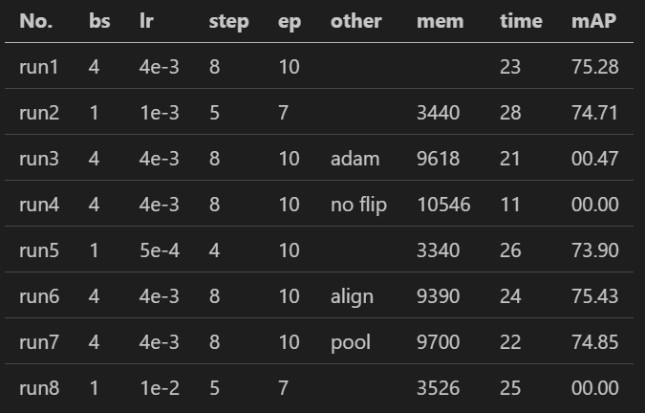

In [0]:
# show the table for keeping results:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/My Drive/test2/table.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)